**Assignment 1 - ML Data Cleaning & Feature Selection**

In [1]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=7e9a23e85f8d70f0ac46b5535f9723b37529f83099566ab96855f0c7dc0a382a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
from google.colab import files
files = files.upload()

Saving Sleep_Efficiency.csv to Sleep_Efficiency.csv


In [4]:

files.values
d1 = pd.read_csv("Sleep_Efficiency.csv" )

d1.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


Uploading the Sleep Efficiency Data set, The Dataset can be described as below.

1.   ID - A unique identifier for each test subject.
2.   Age - Age of the test subject.
3.   Gender - Male or Female Gender of the test subject.
4.   Bedtime - The time the test subject goes to bed each night.
5.   Wakeup time - The time the test subject wakes up each morning.
6.   Sleep duration - The total amount of time the test subject slept (in hours).
7.   Sleep efficiency - A measure of the proportion of time in bed spent asleep.
8.   REM sleep percentage - The percentage of total sleep time spent in REM sleep.
9.   Deep sleep percentage - The percentage of total sleep time spent in deep sleep.
10.  Light sleep percentage - The percentage of total sleep time spent in light sleep.
11.  Awakenings - The number of times the test subject wakes up during the night.
12.  Caffeine Consumption - The amount of caffeine consumed in the 24 hours prior to bedtime (in mg).
13.  Alcohol Consumption - the amount of alcohol consumed in the 24 hours prior to bedtime (in oz).
14.  Smoking status - Whether or not the test subject smokes.
15.  Exercise Frequency - the number of times the test subject exercises each week.



In [5]:
#we will check the data types
d1.dtypes

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

In [6]:
#Creating separate arrays for Numerical and Categorical Columns
numeric_columns = d1.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = d1.select_dtypes(include=['object']).columns.tolist()

# Printing the list of categorical and numerical columns
print("\nCategorical Variables are:")
for row, col in enumerate(categorical_columns):
    print(f'{row+1}. {col}')

print("\nNumerical Variables are:")
for row, col in enumerate(numeric_columns):
    print(f'{row+1}. {col}')


Categorical Variables are:
1. Gender
2. Bedtime
3. Wakeup time
4. Smoking status

Numerical Variables are:
1. ID
2. Age
3. Sleep duration
4. Sleep efficiency
5. REM sleep percentage
6. Deep sleep percentage
7. Light sleep percentage
8. Awakenings
9. Caffeine consumption
10. Alcohol consumption
11. Exercise frequency


**Q1. ARE THERE ANY MISSING VALUES?**




In [7]:
#Q1. ARE THERE ANY MISSING VALUES?
d1.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

**A. Yes there are some missing values in columns 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency '. We can Solve this bys using absolute mean method and fill those missing data by taking mean of the entire column and adding those data into missing fields.**


In [8]:
d1['Awakenings'] = d1['Awakenings'].fillna(d1['Awakenings'].mean())
d1['Caffeine consumption'] = d1['Caffeine consumption'].fillna(d1['Caffeine consumption'].mean())
d1['Alcohol consumption'] = d1['Alcohol consumption'].fillna(d1['Alcohol consumption'].mean())
d1['Exercise frequency'] = d1['Exercise frequency'].fillna(d1['Exercise frequency'].mean())
d1.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

Now we can see there are no Null data present

In [9]:
# Check for duplicate rows
duplicate_rows = d1[d1.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Display the count of duplicate rows
print("\nNumber of Duplicate Rows:", duplicate_rows.shape[0])

Duplicate Rows:
Empty DataFrame
Columns: [ID, Age, Gender, Bedtime, Wakeup time, Sleep duration, Sleep efficiency, REM sleep percentage, Deep sleep percentage, Light sleep percentage, Awakenings, Caffeine consumption, Alcohol consumption, Smoking status, Exercise frequency]
Index: []

Number of Duplicate Rows: 0


As for the Columns like Smoking status and Gender we have non numeric value and for performing regression we need to convert them into numeric value we will do following changes:



1.   Gender = Consider 'Male' value as '0' and 'Female' value as '1'
2.   Smoking status = Consider 'No' value as '0' and 'Yes' value as '1'
So we will replace thes values below


In [10]:

d1["Smoking status"] = d1["Smoking status"].replace({"Yes": 1, "No": 0})
d1['Gender']=d1['Gender'].map({'Male':0, 'Female':1})
d1=d1.drop(['Bedtime','Wakeup time'], axis=1) #as both are date and time format which we wont be using for regression we will drop both column
d1=d1.drop(['ID'], axis=1)# its a unique identifier and doesn't have a significant weightage while performing regression


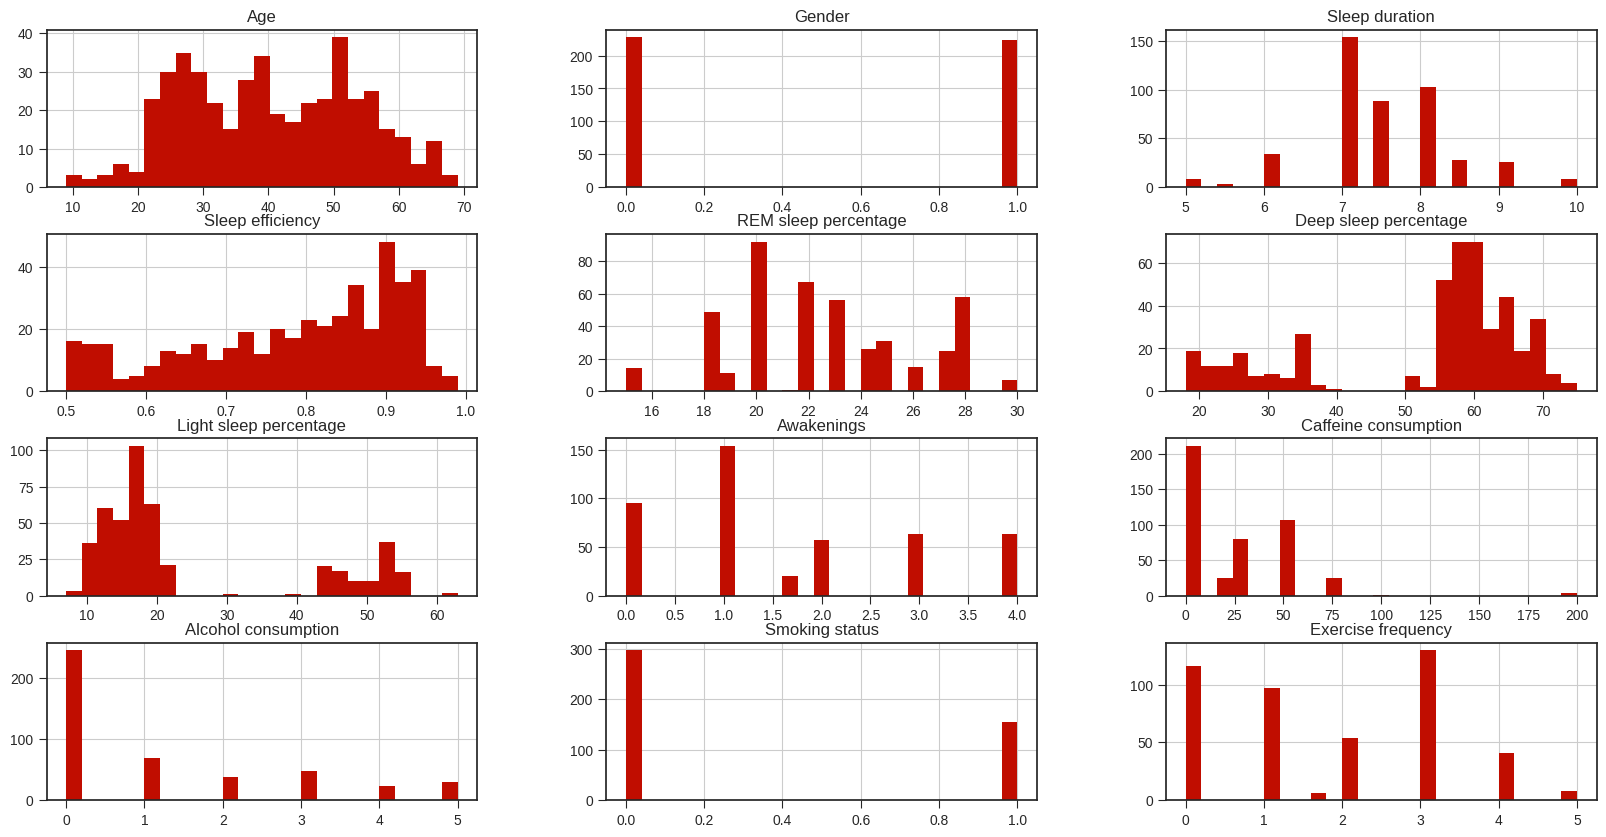

In [11]:
d1 = d1.drop_duplicates()
plt.style.use('seaborn-ticks')
d1.hist(bins=25, figsize=(20,10), color='#c00d00')
plt.show();

**Q3. For the likely distribution of numeric variables**


<Figure size 800x500 with 0 Axes>

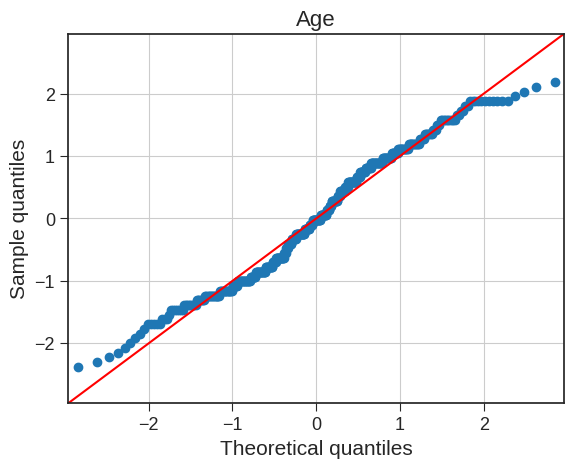

<Figure size 800x500 with 0 Axes>

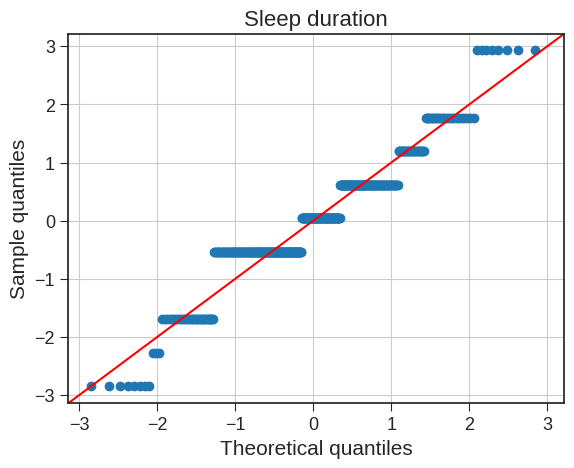

<Figure size 800x500 with 0 Axes>

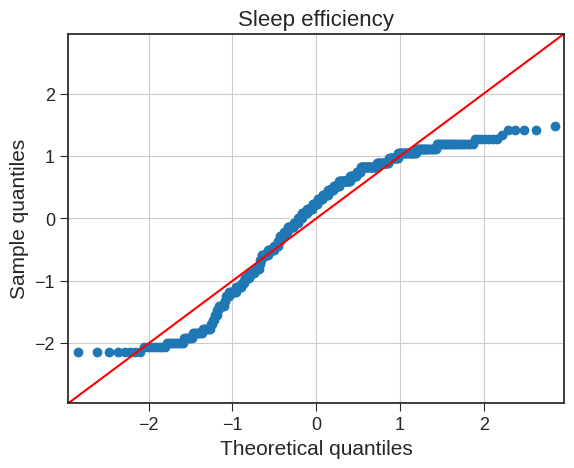

<Figure size 800x500 with 0 Axes>

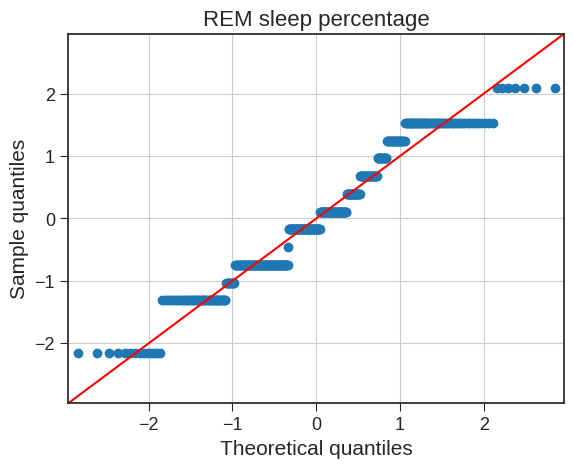

<Figure size 800x500 with 0 Axes>

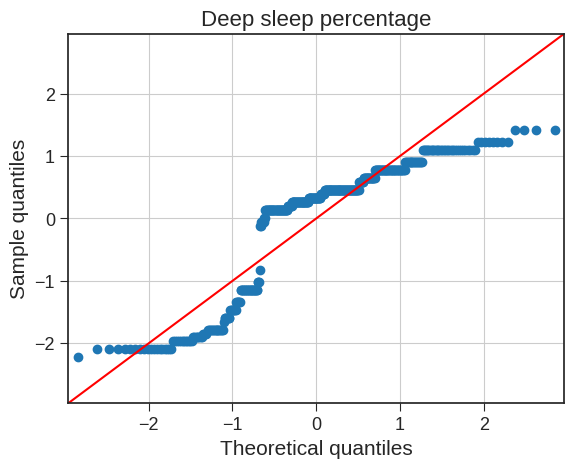

<Figure size 800x500 with 0 Axes>

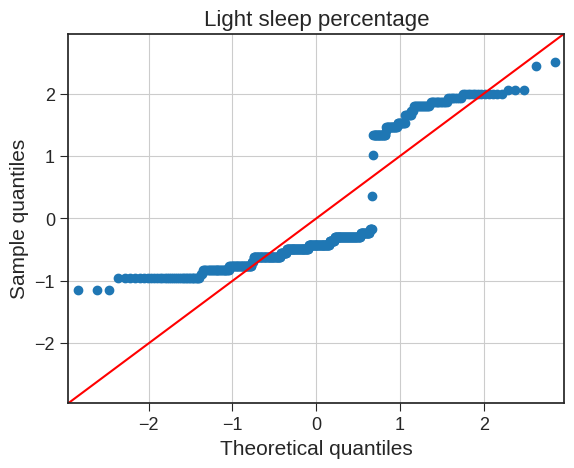

<Figure size 800x500 with 0 Axes>

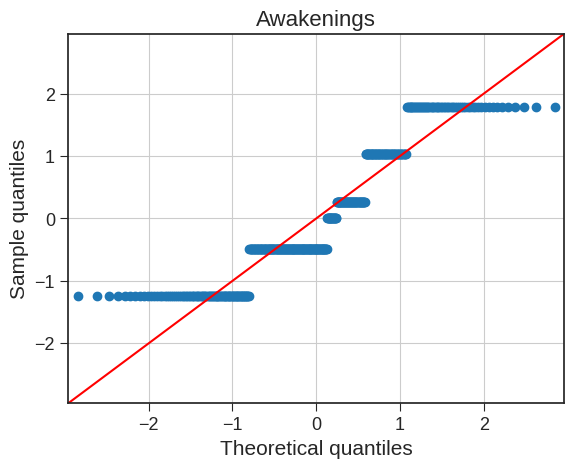

<Figure size 800x500 with 0 Axes>

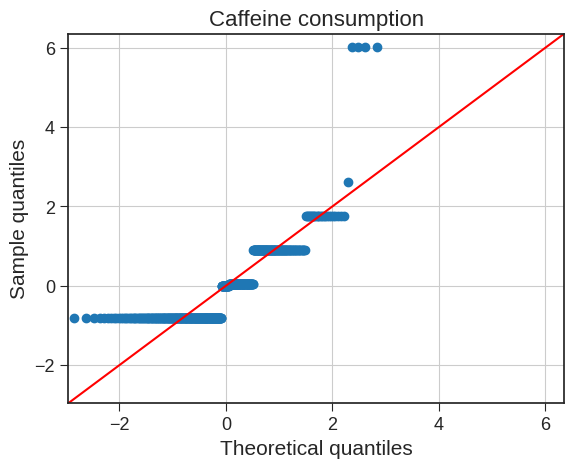

<Figure size 800x500 with 0 Axes>

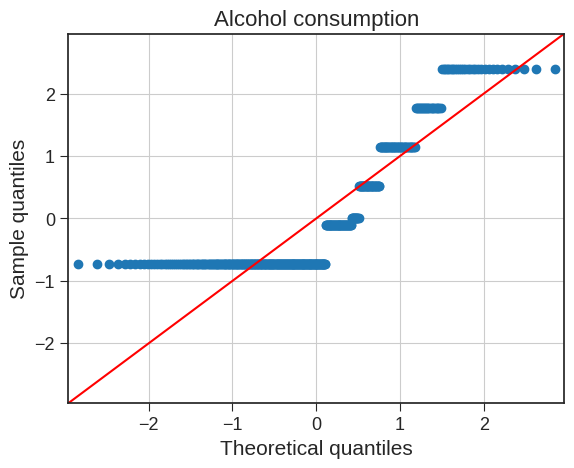

<Figure size 800x500 with 0 Axes>

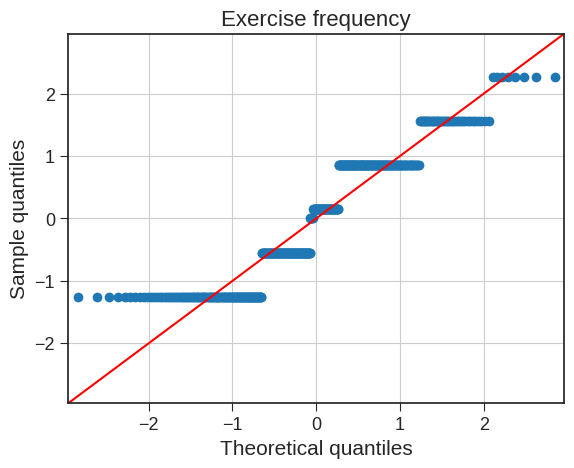

In [12]:
# From above we can observe the likely distributions of all the numeric variable
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


# Numerical Variables are:
# 1. ID
# 2. Age
# 3. Sleep duration
# 4. Sleep efficiency
# 5. REM sleep percentage
# 6. Deep sleep percentage
# 7. Light sleep percentage
# 8. Awakenings
# 9. Caffeine consumption
# 10. Alcohol consumption
# 11. Exercise frequency
data_norm=d1[['Age','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption','Alcohol consumption','Exercise frequency']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("{}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


**A. From the above, it is clear that Age and Sleep efficiency has somewhat normal distribution**



In [13]:
d1.head(20)


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,1,6.0,0.88,18,70,12,0.000000,0.000000,0.0,1,3.0
1,69,0,7.0,0.66,19,28,53,3.000000,0.000000,3.0,1,3.0
2,40,1,8.0,0.89,20,70,10,1.000000,0.000000,0.0,0,3.0
3,40,1,6.0,0.51,23,25,52,3.000000,50.000000,5.0,1,1.0
4,57,0,8.0,0.76,27,55,18,3.000000,0.000000,3.0,0,3.0
5,36,1,7.5,0.90,23,60,17,0.000000,23.653396,0.0,0,1.0
6,27,1,6.0,0.54,28,25,47,2.000000,50.000000,0.0,1,1.0
7,53,0,10.0,0.90,28,52,20,0.000000,50.000000,0.0,1,3.0
8,41,1,6.0,0.79,28,55,17,3.000000,50.000000,0.0,0,1.0
9,11,1,9.0,0.55,18,37,45,4.000000,0.000000,0.0,0,0.0


**Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

METHOD 1: By using SelectKBest method

In [14]:
import pandas as pd
from sklearn import preprocessing

# Assuming 'd1' contains your DataFrame with the independent variables

# Create Dummies (if needed)
data = pd.get_dummies(d1)

# Select only the numeric columns for normalization
numeric_columns = ['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage',
                   'Light sleep percentage', 'Caffeine consumption', 'Alcohol consumption']

# Create a DataFrame containing only the numeric columns
numeric_data = data[numeric_columns]

# Initialize the MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# Normalize the numeric data
normalized_data = min_max_scaler.fit_transform(numeric_data)

# Create a DataFrame with the normalized values
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Replace the original numeric columns with the normalized ones in the original DataFrame
for col in numeric_columns:
    data[col] = normalized_df[col]

# Now 'data' contains the normalized values for the numeric columns
print(data)


          Age  Gender  Sleep duration  Sleep efficiency  REM sleep percentage  \
0    0.933333       1             0.2              0.88              0.200000   
1    1.000000       0             0.4              0.66              0.266667   
2    0.516667       1             0.6              0.89              0.333333   
3    0.516667       1             0.2              0.51              0.533333   
4    0.800000       0             0.6              0.76              0.800000   
..        ...     ...             ...               ...                   ...   
447  0.300000       1             0.5              0.91              0.466667   
448  0.716667       0             0.2              0.74              0.866667   
449  0.516667       1             0.7              0.55              0.333333   
450  0.600000       0             0.4              0.76              0.200000   
451  0.150000       0             0.5              0.63              0.466667   

     Deep sleep percentage 

In [15]:
data.head()


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0.933333,1,0.2,0.88,0.200000,0.912281,0.089286,0.0,0.00,0.0,1,3.0
1,1.000000,0,0.4,0.66,0.266667,0.175439,0.821429,3.0,0.00,0.6,1,3.0
2,0.516667,1,0.6,0.89,0.333333,0.912281,0.053571,1.0,0.00,0.0,0,3.0
3,0.516667,1,0.2,0.51,0.533333,0.122807,0.803571,3.0,0.25,1.0,1,1.0
4,0.800000,0,0.6,0.76,0.800000,0.649123,0.196429,3.0,0.00,0.6,0,3.0


In [16]:
np.any(np.isnan(data)) #checking for NAN data


False

In [17]:
np.all(np.isfinite(data)) #checking for infinite data

True

In [18]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression


X_clf = data.iloc[:, 0:11]  # Assuming the last column (index 15) is the target variable
y_clf = data.iloc[:, 11]    # Target variable
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
# data = data[np.all(np.isfinite(x), axis=1)]
selector = SelectKBest(f_classif, k=5)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [19]:
features_df_new.head()


,Age,Gender,Sleep efficiency,REM sleep percentage,Caffeine consumption
0,0.933333,1,0.88,0.200000,0.00
1,1.000000,0,0.66,0.266667,0.00
2,0.516667,1,0.89,0.333333,0.00
3,0.516667,1,0.51,0.533333,0.25
4,0.800000,0,0.76,0.800000,0.00


 By using SelecttKbest method we got above variables as predictable variables.->
Age	Gender	Caffeine consumption	Alcohol consumption	Exercise frequency



In [20]:
data.corr()


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Age,1.000000,-0.244468,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017468,-0.168273,0.046474,0.031237,0.071892
Gender,-0.244468,1.000000,0.044376,-0.010062,0.161102,-0.075939,0.040534,-0.074205,0.242839,-0.058287,-0.143020,-0.230169
Sleep duration,-0.062462,0.044376,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004829,-0.014542,-0.045662,0.004211,-0.067903
Sleep efficiency,0.098357,-0.010062,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.554498,0.063121,-0.383671,-0.290026,0.257974
REM sleep percentage,0.042091,0.161102,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.024992,0.058018,-0.051709,0.032184,0.031165
Deep sleep percentage,0.021730,-0.075939,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.300301,0.001683,-0.355842,-0.226802,0.178281
Light sleep percentage,-0.031905,0.040534,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312734,-0.015079,0.375662,0.224436,-0.189422
Awakenings,-0.017468,-0.074205,0.004829,-0.554498,-0.024992,-0.300301,0.312734,1.000000,-0.103769,0.198491,-0.020781,-0.212485
Caffeine consumption,-0.168273,0.242839,-0.014542,0.063121,0.058018,0.001683,-0.015079,-0.103769,1.000000,-0.117113,0.007205,-0.064172
Alcohol consumption,0.046474,-0.058287,-0.045662,-0.383671,-0.051709,-0.355842,0.375662,0.198491,-0.117113,1.000000,0.073629,0.006800


By using SelecttKbest method we got above variables as predictable variables.




<Axes: >

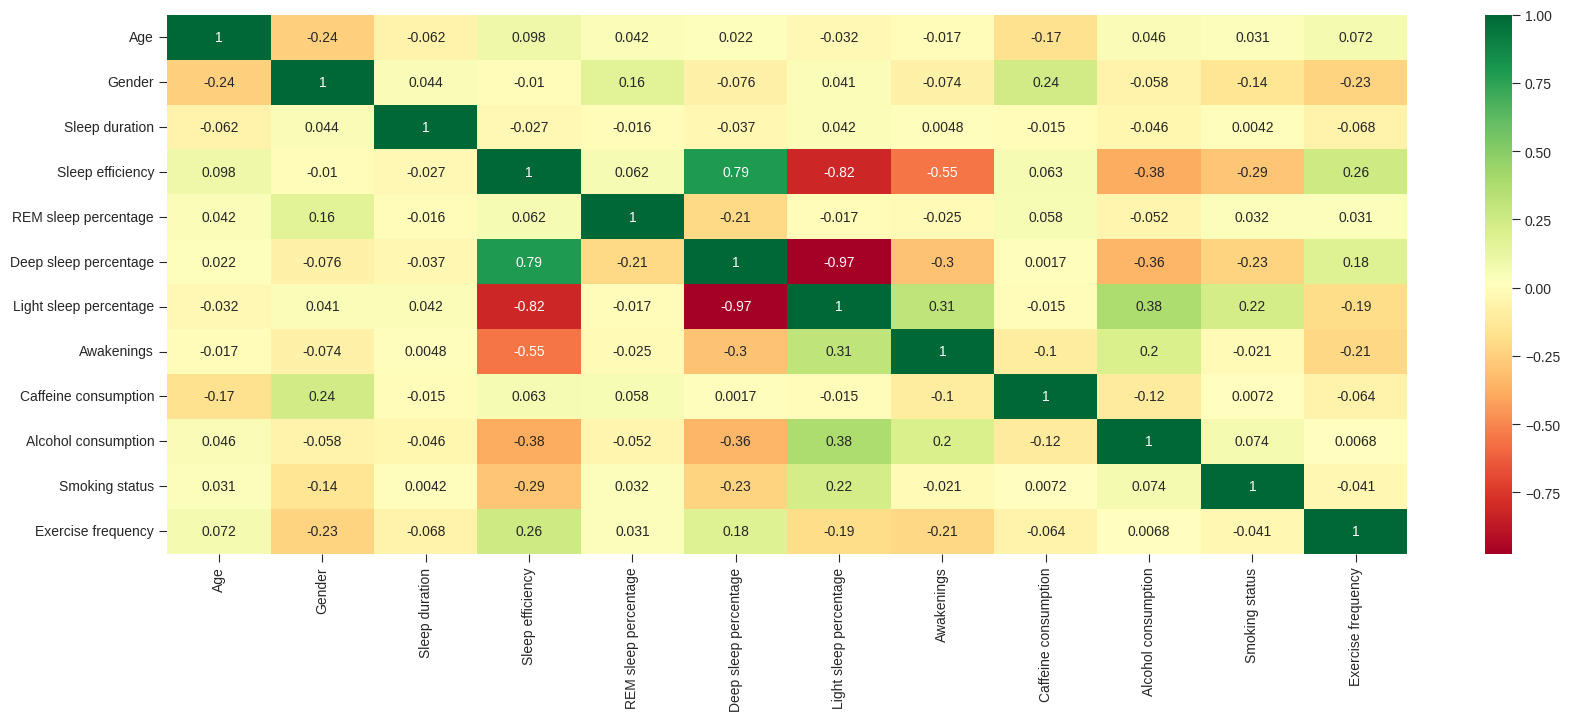

In [21]:

# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

We can see there are lot of co-relation among the variables. The co-relation between length and diameter being the highest, it may mean that essentially both are measuring or predicting same thing


METHOD 2: By using Z score




In [22]:

#Calculating Z Score
import pandas as pd
def calculate_z_scores(d1):
    return (d1 - d1.mean()) / d1.std()
d1 = pd.DataFrame(data,columns=['Age','Sleep duration', 'REM sleep percentage', 'Deep sleep percentage','Light sleep percentage', 'Caffeine consumption', 'Alcohol consumption'])

d1 = d1.apply(pd.to_numeric)
z_scores = calculate_z_scores(d1)
print(z_scores)

          Age  Sleep duration  REM sleep percentage  Deep sleep percentage  \
0    1.876263       -1.691283             -1.308875               1.097274   
1    2.179931       -0.537381             -1.025265              -1.585706   
2   -0.021667        0.616521             -0.741654               1.097274   
3   -0.021667       -1.691283              0.109177              -1.777347   
4    1.268925        0.616521              1.243619               0.139067   
..        ...             ...                   ...                    ...   
447 -1.008590        0.039570             -0.174433               0.266828   
448  0.889339       -1.691283              1.527230               0.266828   
449 -0.021667        1.193471             -0.741654              -1.330184   
450  0.357919       -0.537381             -1.308875               1.225035   
451 -1.691844        0.039570             -0.174433              -1.905108   

     Light sleep percentage  Caffeine consumption  Alcohol cons

If the z score of a data point is more than 3 or less than -3 then it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. We will remove these outliers in the later part.


METHOD 3: Using OLS for finding the p value to check the significant features




In [23]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have a DataFrame named 'data' with the target variable 'SleepQuality' and independent variables
# Adjust the column names and indices based on your actual dataset
independent_variables = ['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
target_variable = 'Gender'

X = data[independent_variables]
y = data[target_variable]

# Add a constant term to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()

# Display the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 Gender   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           6.21e-16
Time:                        01:02:15   Log-Likelihood:                -282.74
No. Observations:                 452   AIC:                             583.5
Df Residuals:                     443   BIC:                             620.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

*   'Age': As 'Age' increases by 1 unit, the log-odds of being in the 'Gender' category decrease by 0.4683.
*   'Sleep duration', 'Alcohol consumption': These variables are not statistically significant as their p-values are above the typical significance level of 0.05.
*   'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Exercise frequency': These variables are statistically significant in predicting 'Gender.'

P-VALUE
*   'Age', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Exercise frequency': These variables have p-values less than 0.05, suggesting they are statistically significant.
*   'Sleep duration', 'Alcohol consumption': These variables have p-values greater than 0.05, indicating they are not statistically significant in predicting 'Gender.'



**Q6. Do the training and test sets have the same data?**



In [24]:
from sklearn.model_selection import  train_test_split

X = data[ ['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]

y = data['Gender']

#Spliting data into Training 80%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=1)


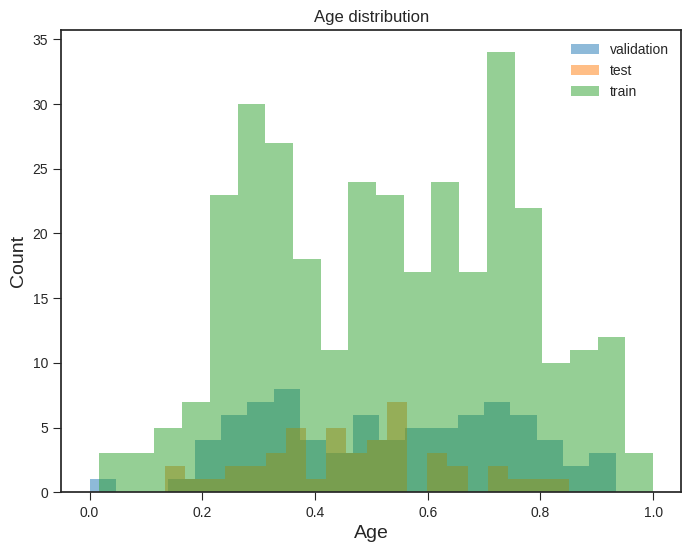

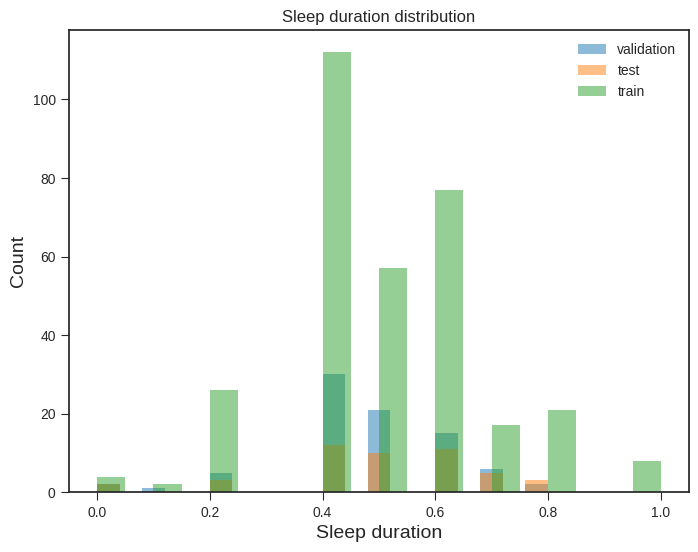

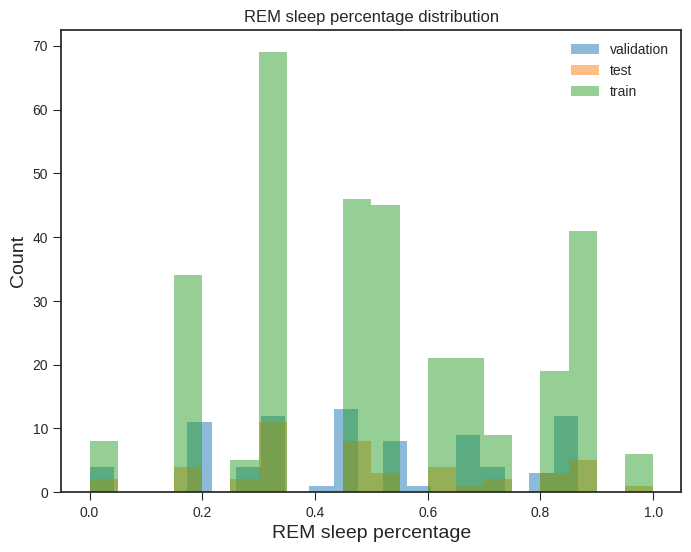

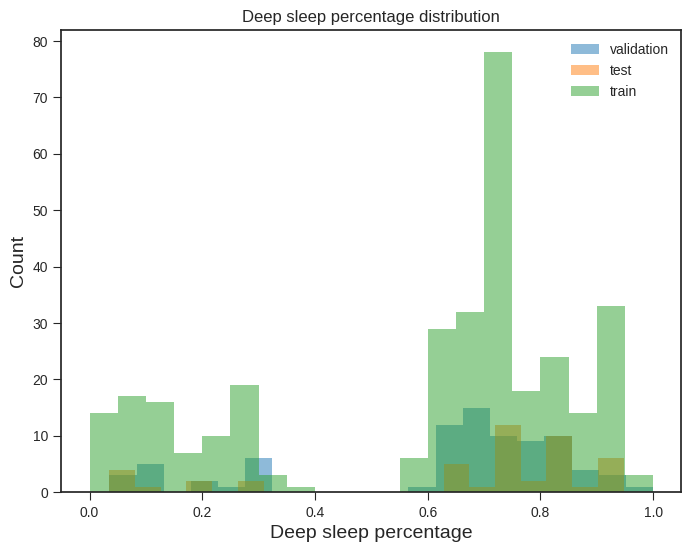

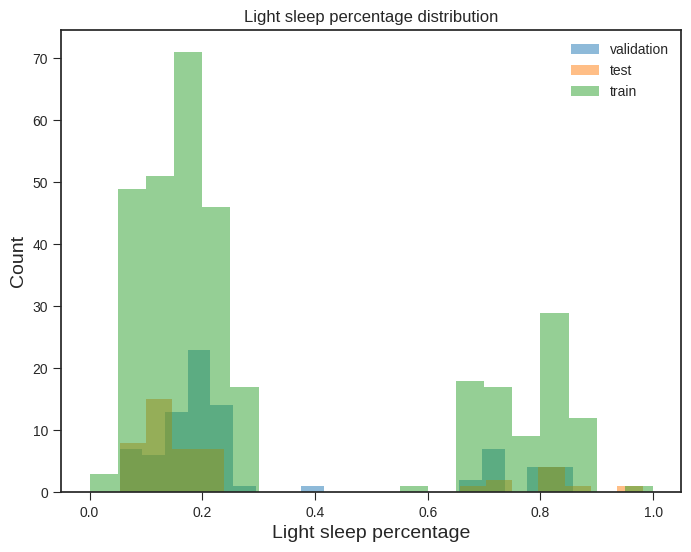

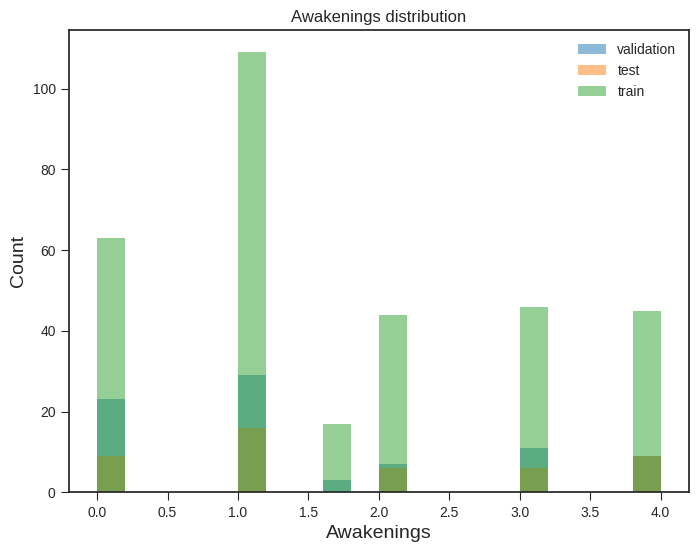

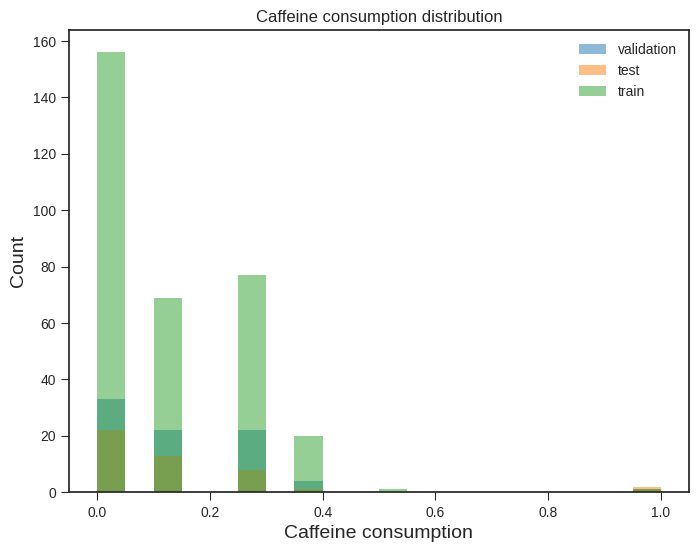

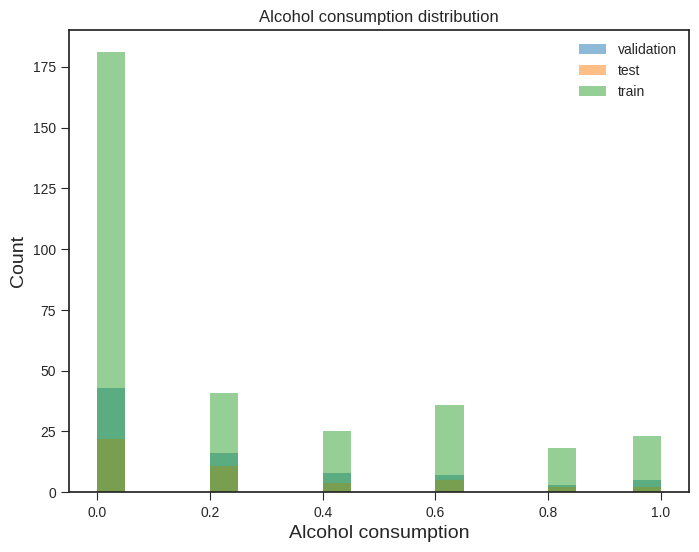

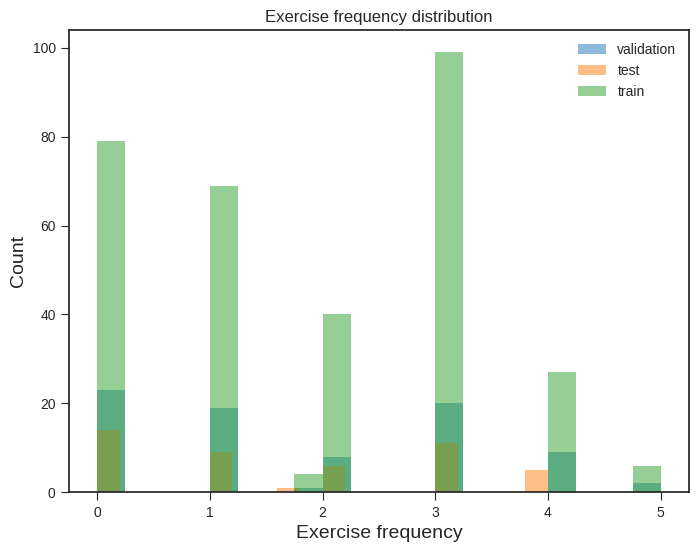

In [25]:
X_test_plot = X_test[['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]

X_val_plot = X_val[['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]

X_train_plot = X_train[['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Yes, the training data and testng data are same. The only difference is testing data is less than the training one as testing data is a small part of training data.


**Q7. Are the predictor variables independent of all other predictor variables?**


In [26]:

data.corr()


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Age,1.000000,-0.244468,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017468,-0.168273,0.046474,0.031237,0.071892
Gender,-0.244468,1.000000,0.044376,-0.010062,0.161102,-0.075939,0.040534,-0.074205,0.242839,-0.058287,-0.143020,-0.230169
Sleep duration,-0.062462,0.044376,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004829,-0.014542,-0.045662,0.004211,-0.067903
Sleep efficiency,0.098357,-0.010062,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.554498,0.063121,-0.383671,-0.290026,0.257974
REM sleep percentage,0.042091,0.161102,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.024992,0.058018,-0.051709,0.032184,0.031165
Deep sleep percentage,0.021730,-0.075939,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.300301,0.001683,-0.355842,-0.226802,0.178281
Light sleep percentage,-0.031905,0.040534,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312734,-0.015079,0.375662,0.224436,-0.189422
Awakenings,-0.017468,-0.074205,0.004829,-0.554498,-0.024992,-0.300301,0.312734,1.000000,-0.103769,0.198491,-0.020781,-0.212485
Caffeine consumption,-0.168273,0.242839,-0.014542,0.063121,0.058018,0.001683,-0.015079,-0.103769,1.000000,-0.117113,0.007205,-0.064172
Alcohol consumption,0.046474,-0.058287,-0.045662,-0.383671,-0.051709,-0.355842,0.375662,0.198491,-0.117113,1.000000,0.073629,0.006800


<Axes: >

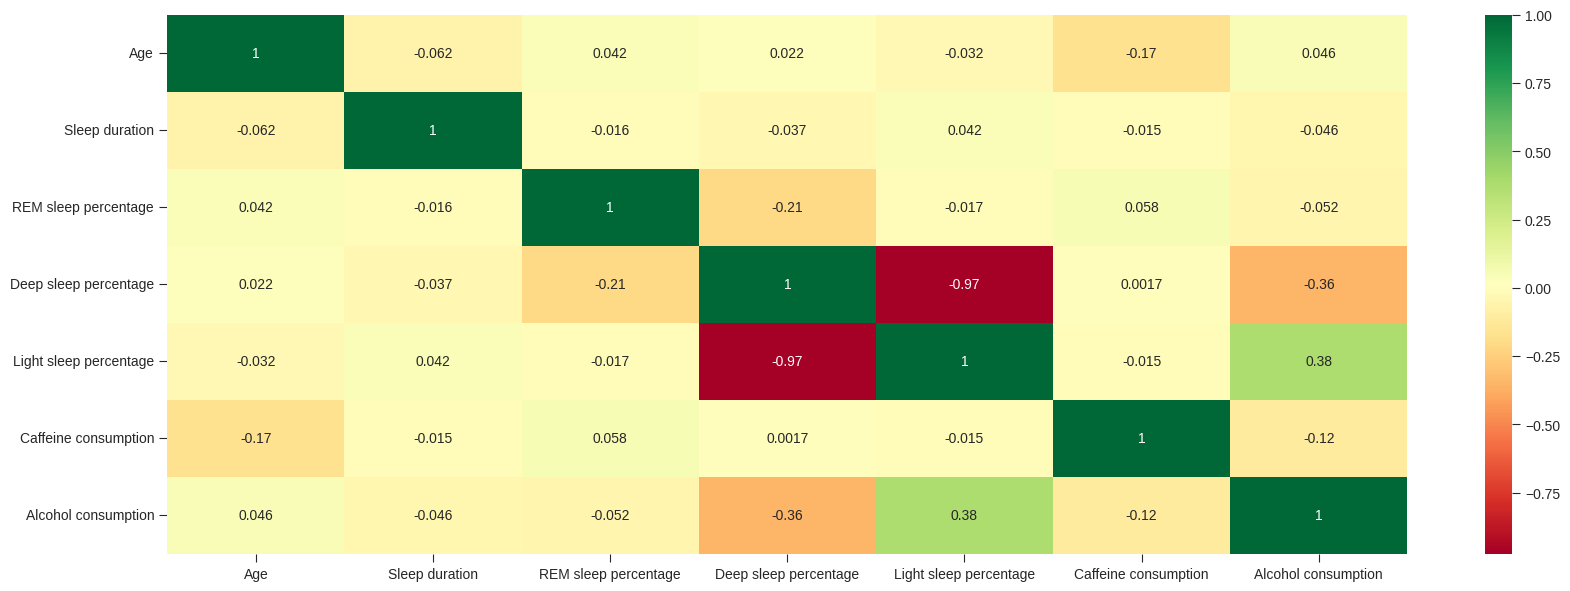

In [27]:

#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(d1.corr(), annot=True, cmap='RdYlGn')

From above we can see coorelation between Alcohol Consumption and Light Sleep Percentage is 0.38

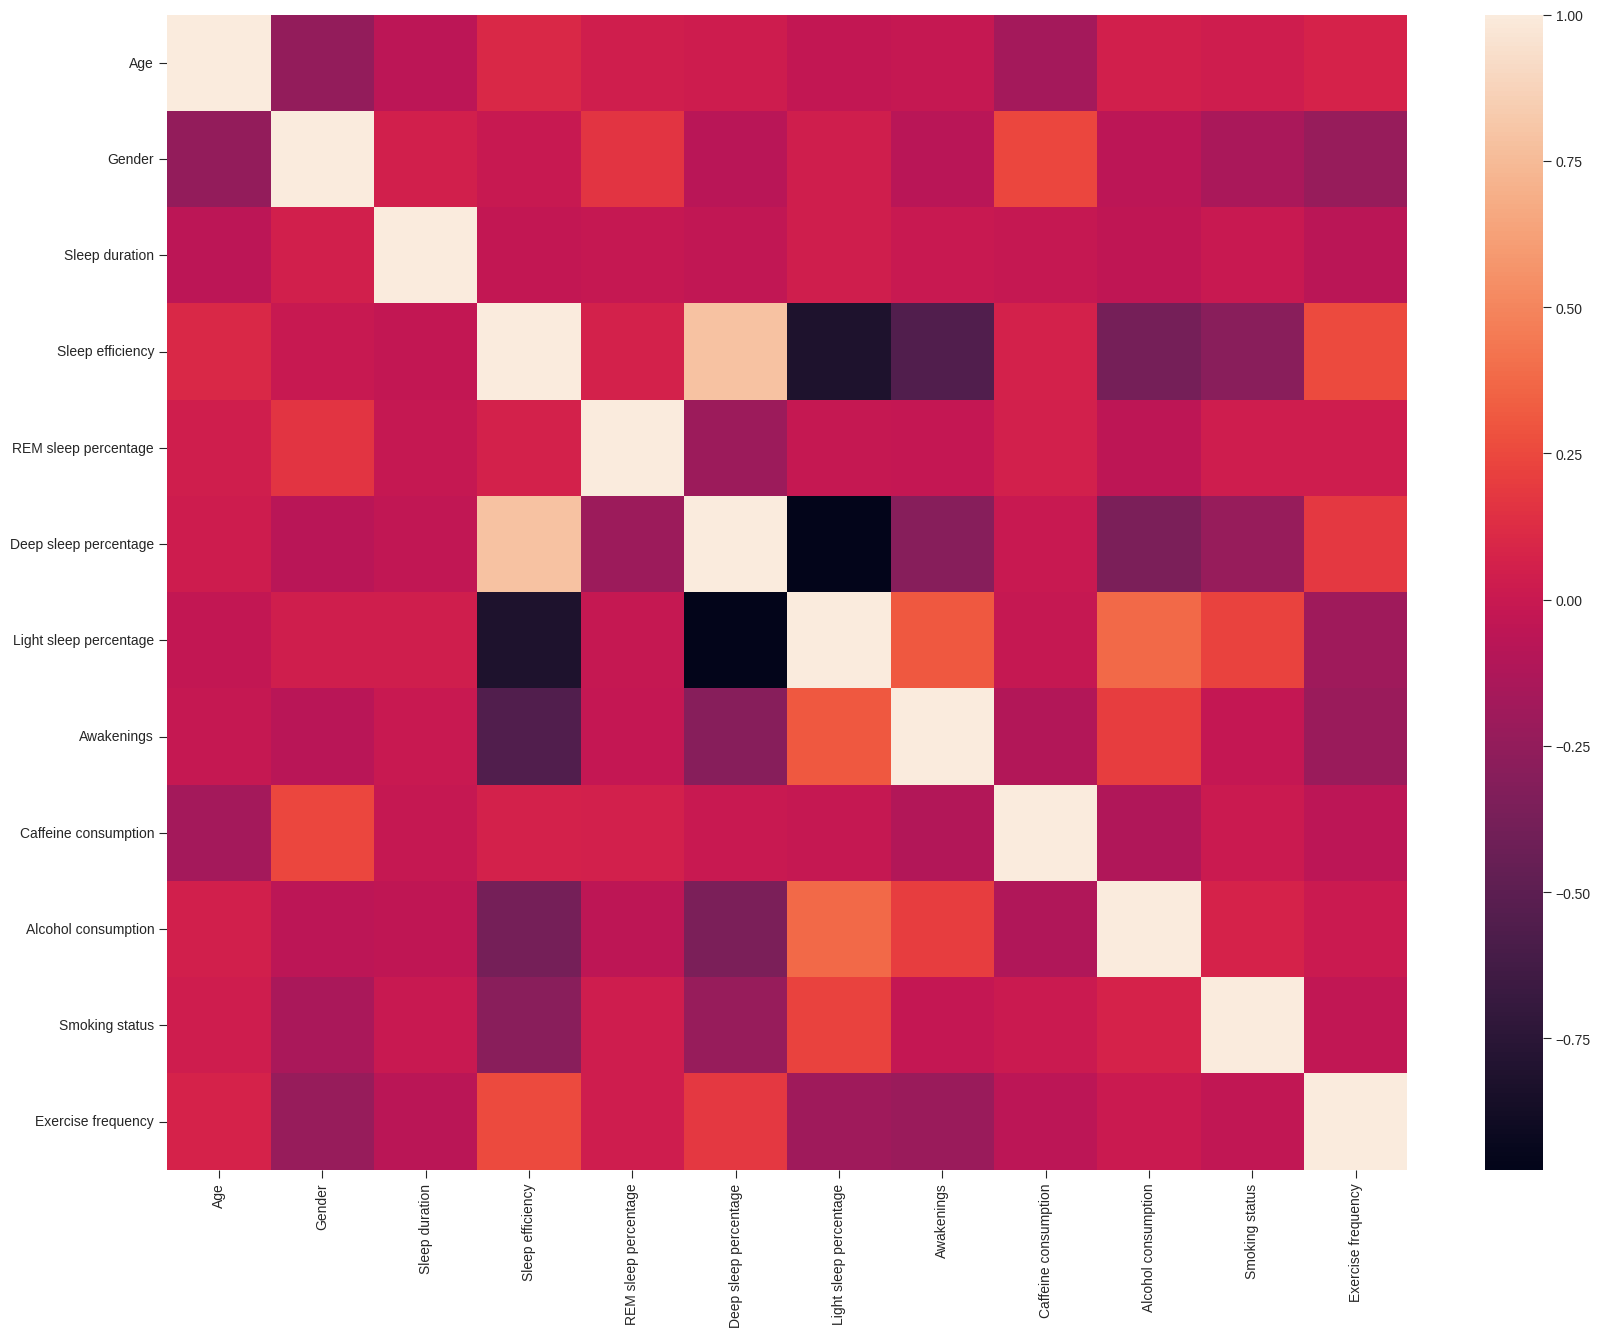

In [28]:

plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

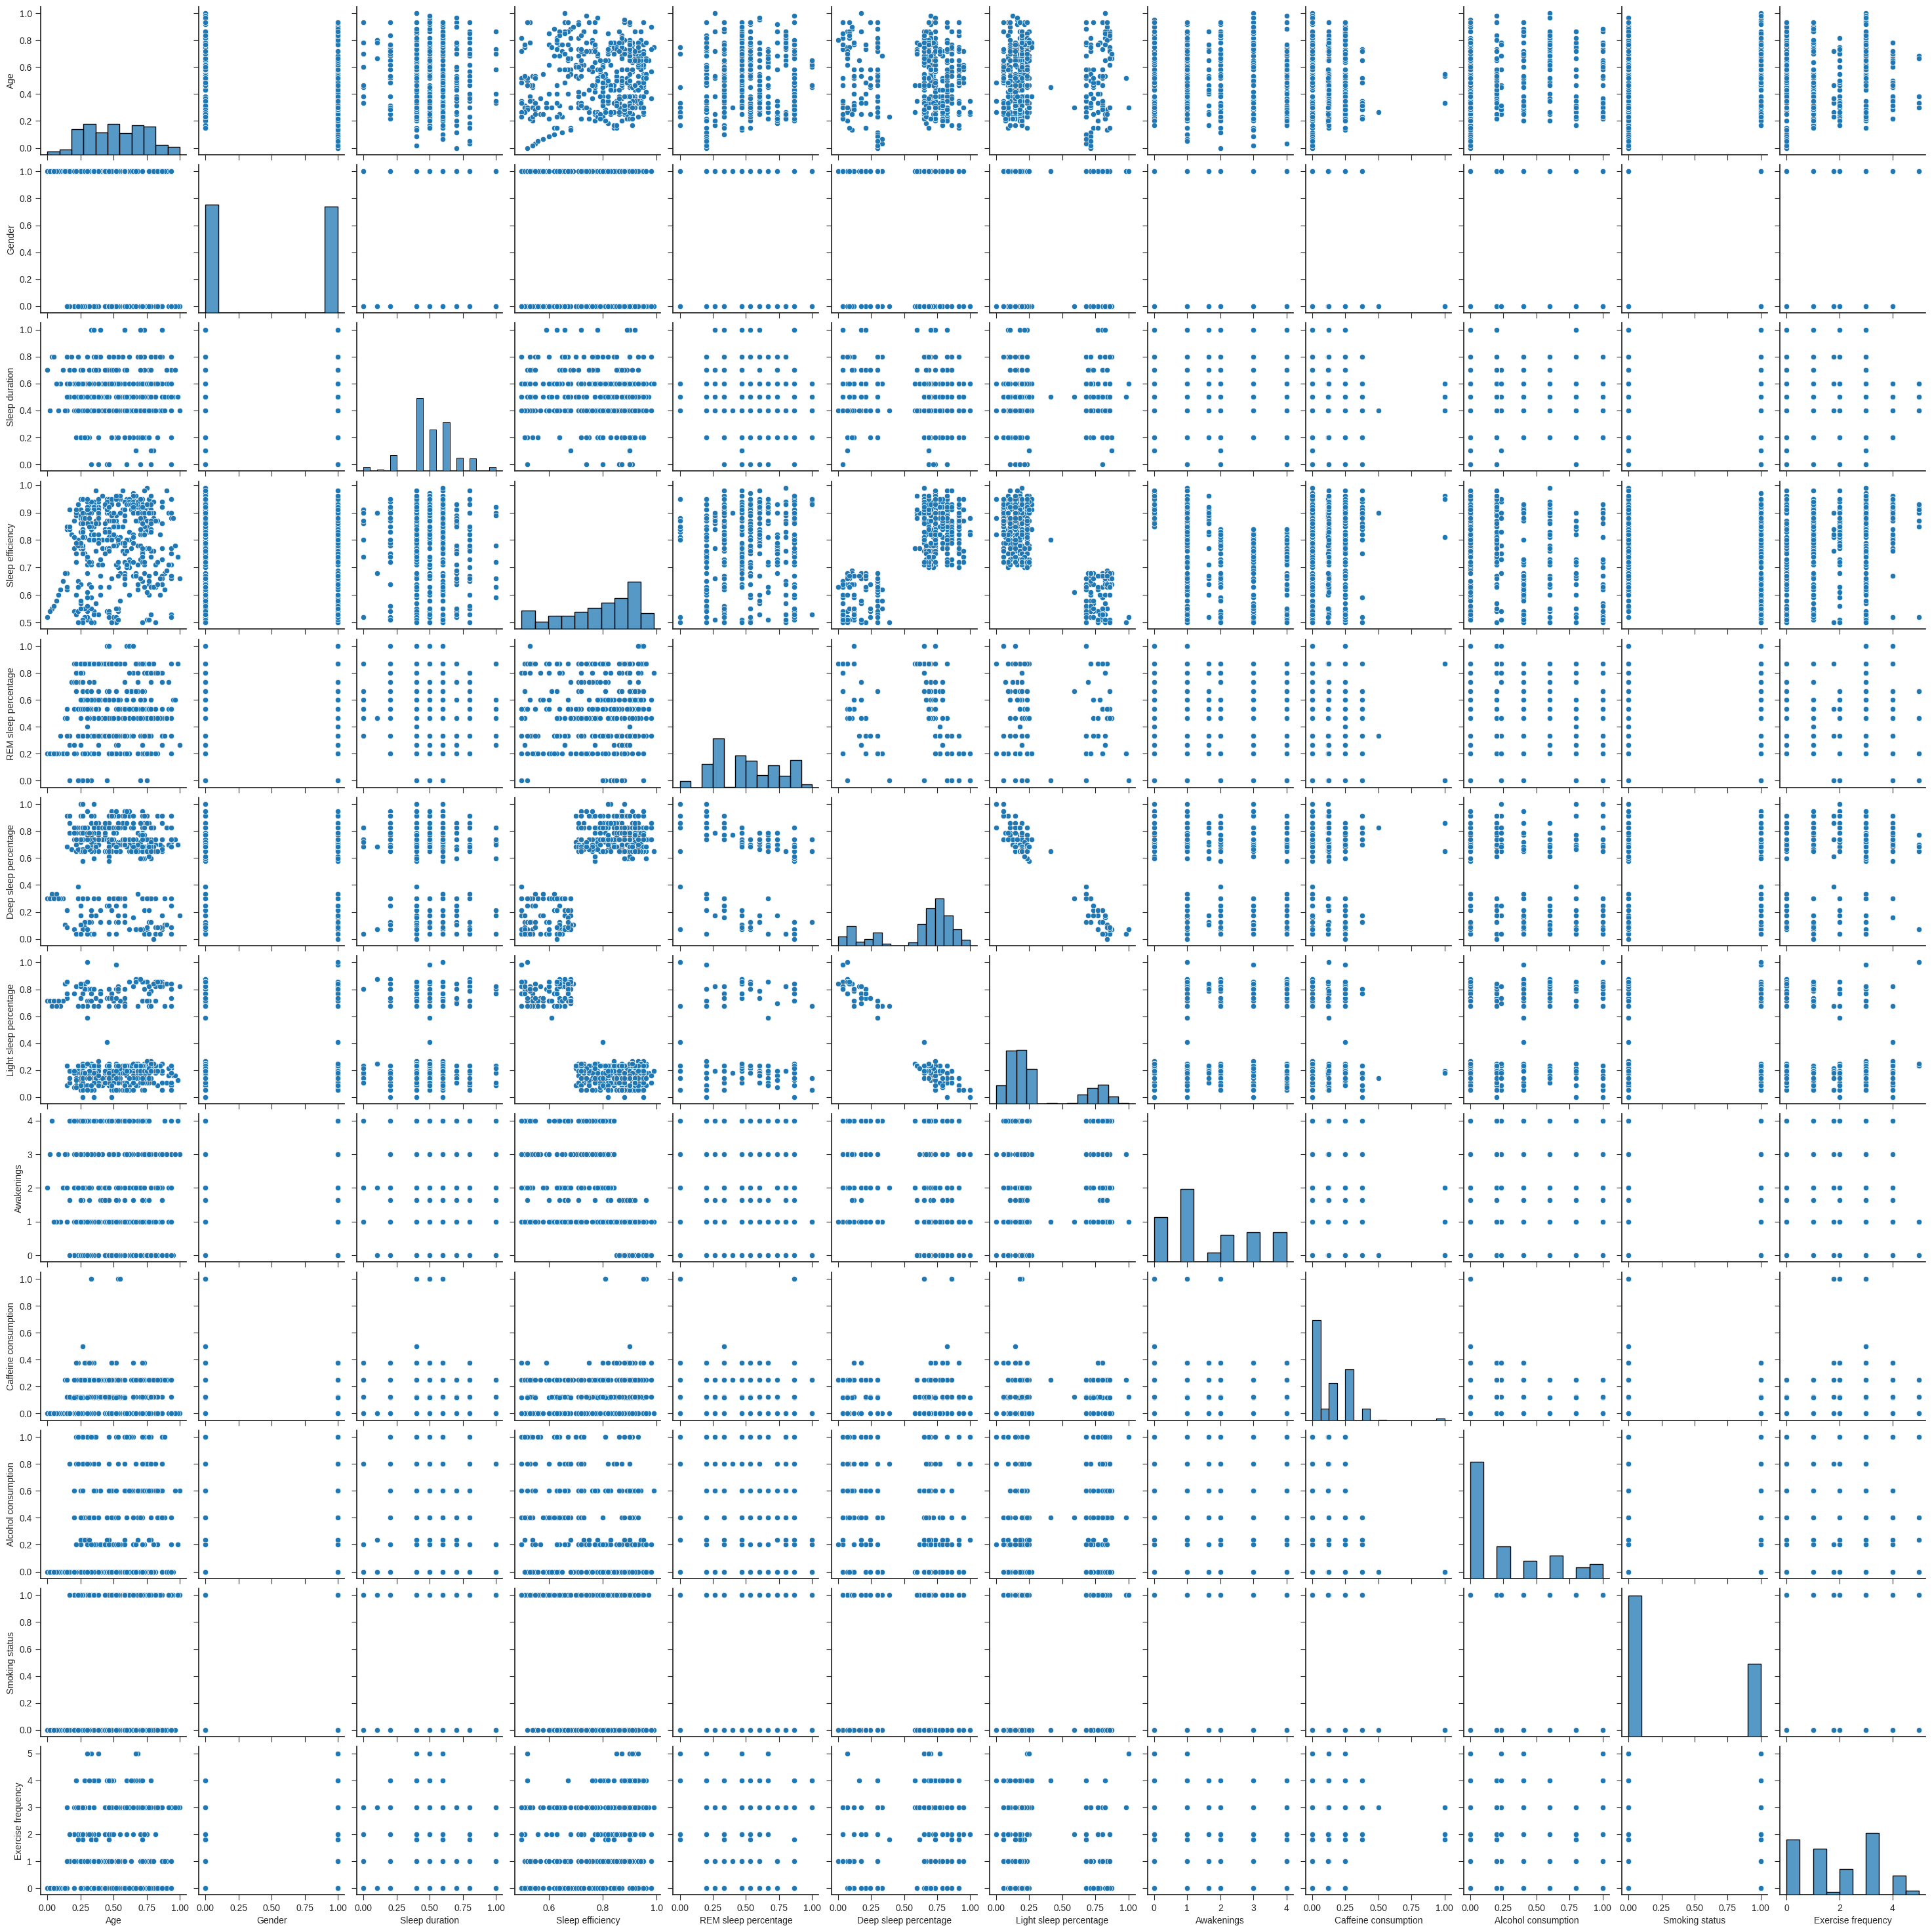

In [29]:
#pair plot to check the colinearity
sns.pairplot(data)
plt.show()

Based on the graphical evidence, it seems that most predictor variables have correlations close to zero, suggesting relative independence. However, there are some exceptions where certain variables show stronger correlations, indicating potential dependencies.



**Q8. Which predictor variables are the most important?**






From SelecKbest it is observed that Caffeine Consumption is the most important predictor variable From OLS method Caffeine consumption and poutcome_success should be the most important Predictor variable.


**Q9. Do the ranges of the predictor variables make sense?**



<Axes: >

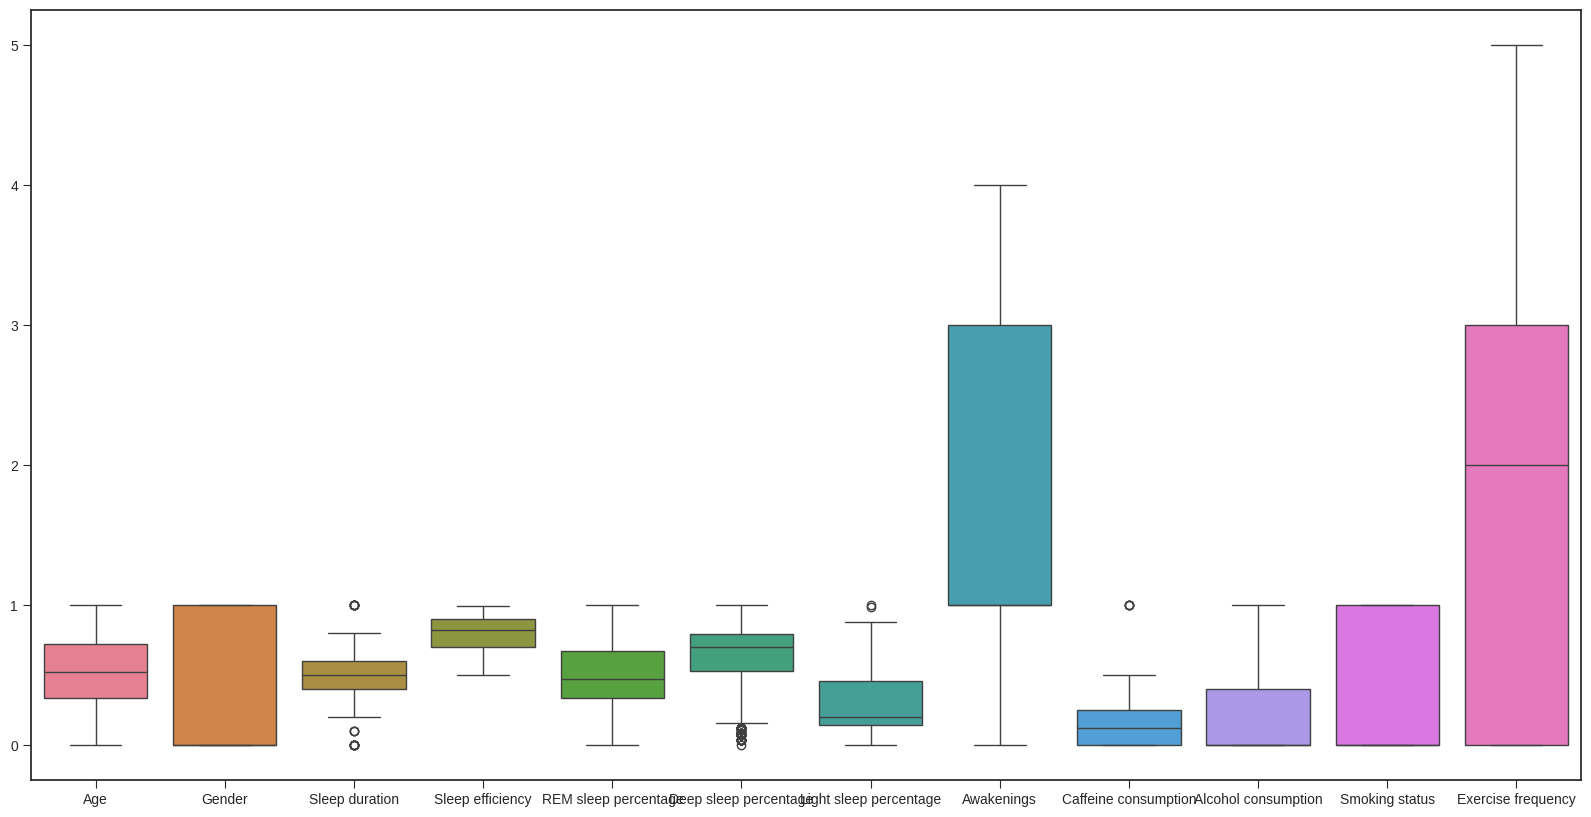

In [30]:

#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,10))
sns.boxplot(data=data)


**A. The variable ranges are nearly the same because we standardized the data. However, as the graphic above shows, there are a few outliers that we may need to eliminate before continuing so that the data begins to make much more sense**.


In [31]:
data.describe()


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,0.521423,0.495575,0.493142,0.788916,0.507670,0.610930,0.313606,1.641204,0.118267,0.234703,0.340708,1.791480
std,0.219537,0.500534,0.173325,0.135237,0.235064,0.274636,0.273458,1.326338,0.146769,0.319203,0.474472,1.418603
min,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.400000,0.697500,0.333333,0.530702,0.142857,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.516667,0.000000,0.500000,0.820000,0.466667,0.701754,0.196429,1.000000,0.118267,0.000000,0.000000,2.000000
75%,0.716667,1.000000,0.600000,0.900000,0.666667,0.789474,0.455357,3.000000,0.250000,0.400000,1.000000,3.000000
max,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000


**Q10. What are the distributions of the predictor variables?**






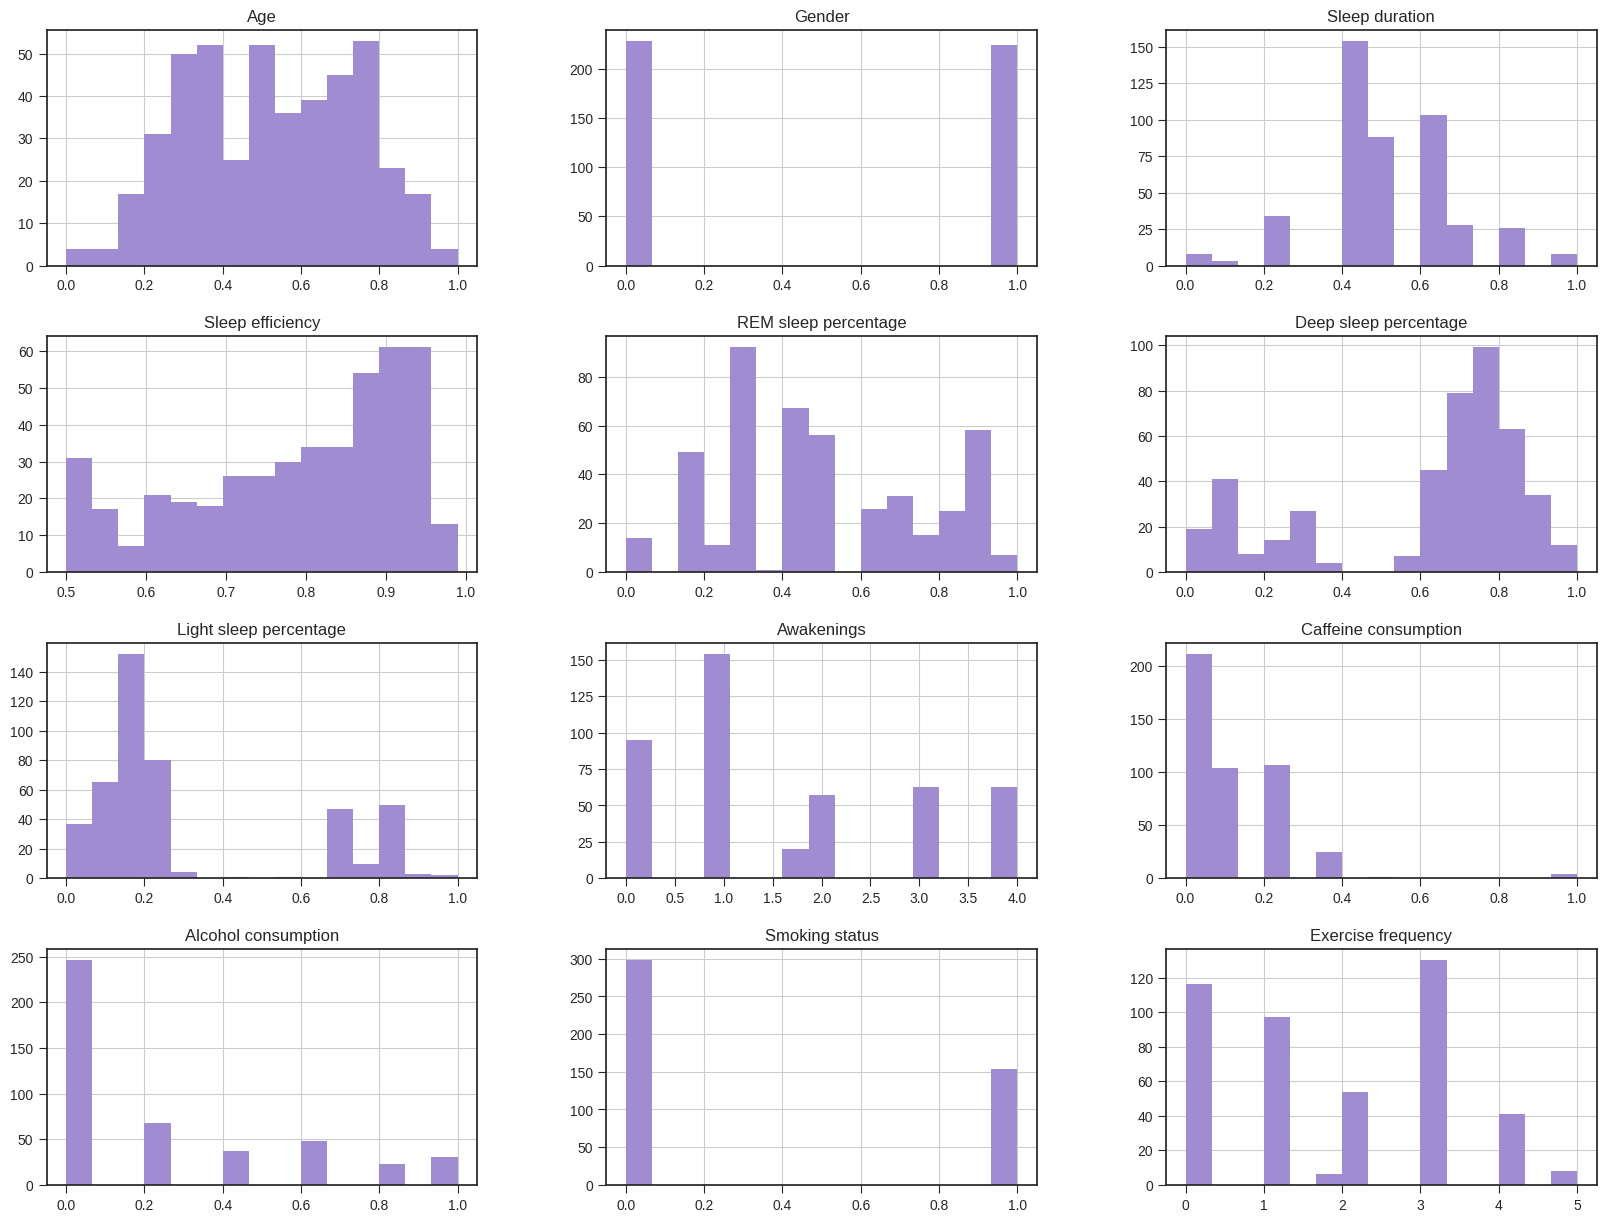

In [32]:

plt.style.use('seaborn-ticks')

data.hist(bins=15, figsize=(20,15), color='#a08cd1')
plt.show();

From above distribution we can see distribution where smoking status and gender where the values are 0 or 1 while others

**Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**



In [33]:

# We will Run the Logistic regression for data before and after removing the outliers
#Now it is for before removing the outliers

#import the pkgs required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()

In [34]:

#input variables
X1 = data[['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Caffeine consumption', 'Alcohol consumption']]
#output variable
y1 = data[['Gender']]
#splitting data in to train and test, 35% of data will be used for testing
#stratify for sorting
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.10, random_state=42, stratify=y1)
logisticRegr.fit(X1_train_data, y1_train_data)

LogisticRegression()

In [35]:
#The output of a Logistic regression model is a probability. We can select a threshold value.
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 1.0


In [36]:

#setting threshold 1.0 will be the ideal case
logisticRegr.predict(X1_test_data)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0])

In [37]:
Z = logisticRegr.predict(X1_test_data)


In [38]:

rms = mean_squared_error(y1_test_data, Z , squared=False);
rms

0.5897678246195885

In [39]:
logisticRegr.score(X1_test_data, y1_test_data)


0.6521739130434783

From the above, we can observe that we got 66% accuracy for our dataset with outliers.



In [40]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the predictor variables
# Define the predictor variables
predictor_variables = ['Age', 'Sleep duration', 'REM sleep percentage',
                       'Deep sleep percentage', 'Light sleep percentage',
                       'Caffeine consumption', 'Alcohol consumption',
                       'Smoking status']

# Calculate the IQR for each predictor variable
Q1 = data[predictor_variables].quantile(0.25)
Q3 = data[predictor_variables].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for detecting outliers
threshold = 1.0

# Identify outliers
outliers = (data[predictor_variables] < (Q1 - threshold * IQR)) | (data[predictor_variables] > (Q3 + threshold * IQR))

# Count the number of outliers in each predictor variable
outlier_counts = outliers.sum()

# Print the number of outliers for each predictor variable
print("Number of outliers for each predictor variable:")
print(outlier_counts)


Number of outliers for each predictor variable:
Age                        0
Sleep duration            19
REM sleep percentage       0
Deep sleep percentage     82
Light sleep percentage    58
Caffeine consumption       4
Alcohol consumption       30
Smoking status             0
dtype: int64


In [41]:
# Remove outliers
clean_data = data[~outliers.any(axis=1)]

# Display the cleaned data
print("Shape of cleaned data:", clean_data.shape)

Shape of cleaned data: (332, 12)


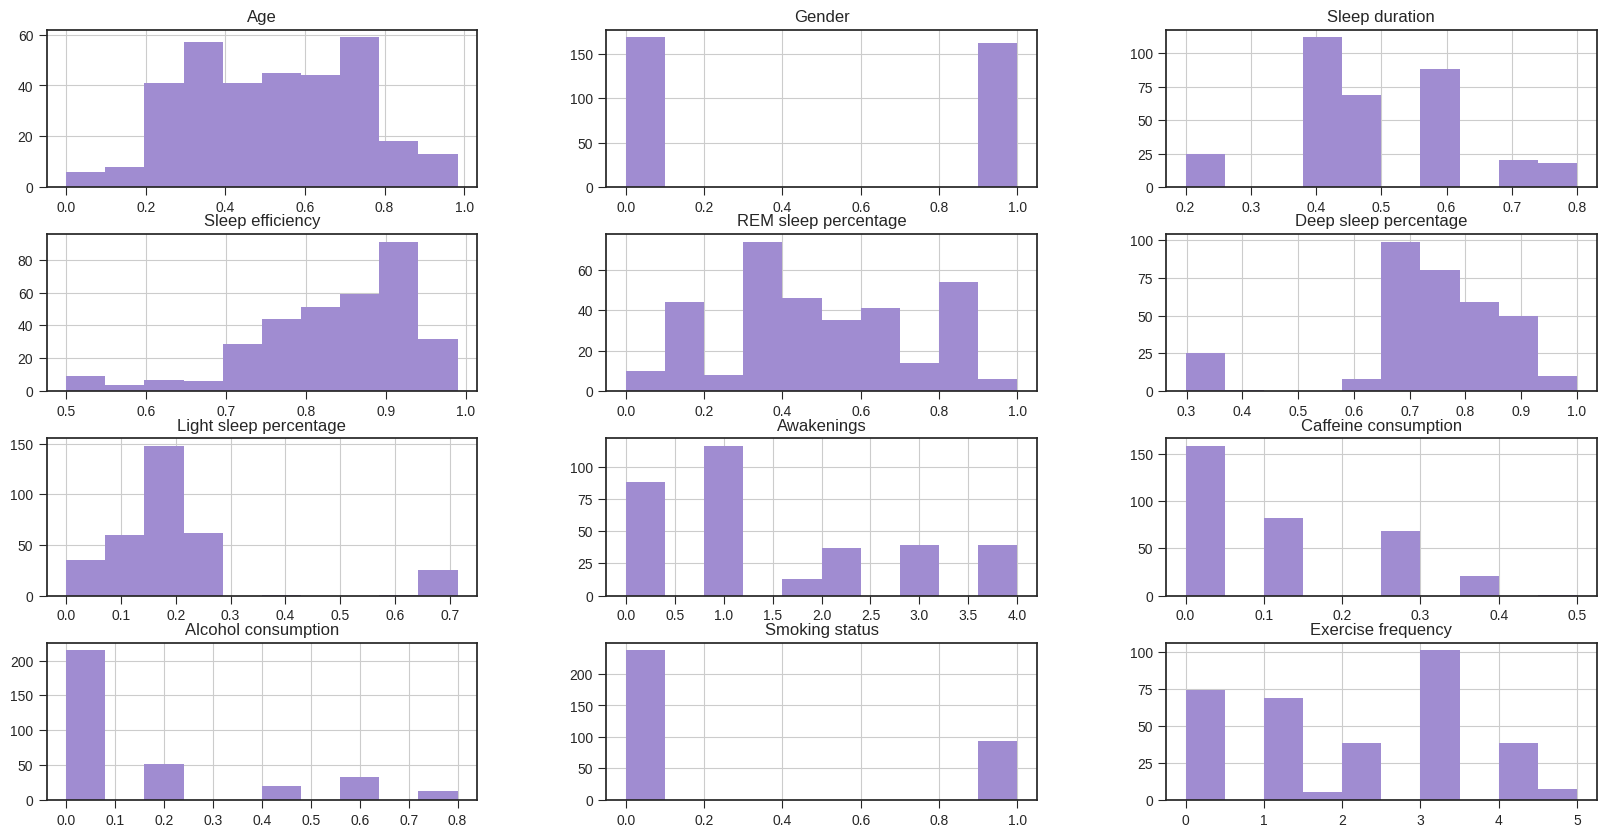

In [42]:
plt.style.use('seaborn-ticks')

clean_data.hist(bins=10, figsize=(20,10), color='#a08cd1')
plt.show();

Now we will again check the accuracy after removing the outliers



In [43]:
#import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
#input variables
X2 = clean_data[['Age', 'Sleep duration', 'REM sleep percentage',
                       'Deep sleep percentage', 'Light sleep percentage',
                       'Caffeine consumption', 'Alcohol consumption',
                       'Smoking status']]
#output variable
y2 = clean_data[['Gender']]
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting
#fixed value is assigned like random_state = 42
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.10, random_state=42, stratify=y2)
logisticRegr.fit(X2_train_data, y2_train_data)

LogisticRegression()

In [44]:
#The output of a Logistic regression model is a probability. We can select a threshold value.
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 1.0
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X2_test_data)


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [45]:
Z2 = logisticRegr.predict(X2_test_data)


In [46]:


rms = mean_squared_error(y2_test_data, Z2 , squared=False);
rms

0.42008402520840293

In [47]:
logisticRegr.score(X2_test_data, y2_test_data)


0.8235294117647058

**So for final_data(without outliers) the accuracy is 82.35% And the data with Outliers has the accuracy of 65%**

**We can conclude that Data with outliers predicts less accuracy than the oe without outliers.**


**Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [48]:
!pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=badaae5e0659b8929a49d9e665cac2518caf0b1d2555ae1d6ecddc7c707dc4f9
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=117216595c1945dd63b722f46e1feba24886b439b2433277fe997c4d90ee1357
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [49]:
from sklearn.impute import SimpleImputer
from fancyimpute import KNN

# Remove 1%, 5%, and 10% of the data randomly
def remove_random_data(data, percentage):
    rows = data.shape[0]
    columns = data.shape[1]
    to_remove = int(rows * percentage)
    indexes = np.random.choice(rows, to_remove, replace=False)
    data_missing = data.copy()
    data_missing.iloc[indexes, :] = np.nan
    return data_missing


In [50]:


# Calculate % error on residuals for numeric data
def calculate_error(data, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    error = np.abs(data_imputed - data)
    total_error = error.sum()
    percent_error = (total_error / data.size) * 100
    return percent_error

In [51]:


# Check for bias and variance of the error
def check_bias_variance(data, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    bias = np.mean(data_imputed - data)
    variance = np.var(data_imputed - data)
    return bias, variance

In [52]:

# Remove 1% of data
data_missing_1 = remove_random_data(data, 0.01)

# Remove 5% of data
data_missing_5 = remove_random_data(data, 0.05)

# Remove 10% of data
data_missing_10 = remove_random_data(data, 0.1)


In [53]:
# Impute values using the mean method
mean_imp = SimpleImputer(strategy='mean')
mean_error_1 = calculate_error(data, data_missing_1, mean_imp)
mean_error_5 = calculate_error(data, data_missing_5, mean_imp)
mean_error_10 = calculate_error(data, data_missing_10, mean_imp)
mean_bias_1, mean_variance_1 = check_bias_variance(data, data_missing_1, mean_imp)
mean_bias_5, mean_variance_5 = check_bias_variance(data, data_missing_5, mean_imp)
mean_bias_10, mean_variance_10 = check_bias_variance(data, data_missing_10, mean_imp)

In [54]:
# Impute values using the median method
median_imp = SimpleImputer(strategy='median')
median_error_1 = calculate_error(data, data_missing_1, median_imp)
median_error_5 = calculate_error(data, data_missing_5, median_imp)
median_error_10 = calculate_error(data, data_missing_10, median_imp)
median_bias_1, median_variance_1 = check_bias_variance(data, data_missing_1, median_imp)
median_bias_5, median_variance_5 = check_bias_variance(data, data_missing_5, median_imp)
median_bias_10, median_variance_10 = check_bias_variance(data, data_missing_10, median_imp)

In [55]:
print("Mean Impute Error for 1% Missing Data: ", mean_error_1)
print("Mean Impute Error for 5% Missing Data: ", mean_error_5)
print("Mean Impute Error for 10% Missing Data: ", mean_error_10)
print("Median Impute Error for 1% Missing Data: ", median_error_1)
print("Median Impute Error for 5% Missing Data: ", median_error_5)
print("Median Impute Error for 10% Missing Data: ", median_error_10)

Mean Impute Error for 1% Missing Data:  Age                       0.009965
Gender                    0.036873
Sleep duration            0.007375
Sleep efficiency          0.007630
REM sleep percentage      0.018437
Deep sleep percentage     0.010181
Light sleep percentage    0.010712
Awakenings                0.067131
Caffeine consumption      0.011283
Alcohol consumption       0.019744
Smoking status            0.031029
Exercise frequency        0.089920
dtype: float64
Mean Impute Error for 5% Missing Data:  Age                       0.086322
Gender                    0.204860
Sleep duration            0.058997
Sleep efficiency          0.039068
REM sleep percentage      0.091331
Deep sleep percentage     0.074471
Light sleep percentage    0.081020
Awakenings                0.434987
Caffeine consumption      0.050701
Alcohol consumption       0.115080
Smoking status            0.174076
Exercise frequency        0.546773
dtype: float64
Mean Impute Error for 10% Missing Data:  Age      

In [56]:

print("Mean Impute Bias for 1% Missing Data: " , mean_bias_1)
print("Mean Impute Variance for 1% Missing Data: ", mean_variance_1)
print("Median Impute Bias for 1% Missing Data: ", median_bias_1)
print("Median Impute Variance for 1% Missing Data: ", median_variance_1)


Mean Impute Bias for 1% Missing Data:  Age                       0.001196
Gender                   -0.000040
Sleep duration           -0.000061
Sleep efficiency         -0.000836
REM sleep percentage     -0.000676
Deep sleep percentage    -0.001085
Light sleep percentage    0.001285
Awakenings               -0.002403
Caffeine consumption      0.000219
Alcohol consumption       0.000756
Smoking status            0.000810
Exercise frequency       -0.010790
dtype: float64
Mean Impute Variance for 1% Missing Data:  Age                       0.000223
Gender                    0.002213
Sleep duration            0.000089
Sleep efficiency          0.000124
REM sleep percentage      0.000688
Deep sleep percentage     0.000278
Light sleep percentage    0.000217
Awakenings                0.014134
Caffeine consumption      0.000239
Alcohol consumption       0.000661
Smoking status            0.001733
Exercise frequency        0.017465
dtype: float64
Median Impute Bias for 1% Missing Data:  Age    

In [57]:

#By using KNN
from sklearn.impute import KNNImputer


# Specify the number of nearest neighbors to use (k)
k = 5

# Create the KNN imputer
imputer = KNNImputer(n_neighbors=k)

# Impute the missing values in data_missing_1 using KNN
data_imputed_1 = imputer.fit_transform(data_missing_1)

# Impute the missing values in data_missing_5 using KNN
data_imputed_5 = imputer.fit_transform(data_missing_5)

# Impute the missing values in data_missing_10 using KNN
data_imputed_10 = imputer.fit_transform(data_missing_10)

In [58]:
#To print the mean squared error (MSE) between the original values and the imputed values

# Calculate the MSE between the original data and data_imputed_1
mse_1 = np.mean((data - data_imputed_1)**2)
print("MSE for 1% missing data:", mse_1)

# Calculate the MSE between the original data and data_imputed_5
mse_5 = np.mean((data - data_imputed_5)**2)
print("MSE for 5% missing data:", mse_5)

# Calculate the MSE between the original data and data_imputed_10
mse_10 = np.mean((data - data_imputed_10)**2)
print("MSE for 10% missing data:", mse_10)

MSE for 1% missing data: Age                       0.000225
Gender                    0.002213
Sleep duration            0.000089
Sleep efficiency          0.000125
REM sleep percentage      0.000688
Deep sleep percentage     0.000279
Light sleep percentage    0.000218
Awakenings                0.014140
Caffeine consumption      0.000239
Alcohol consumption       0.000662
Smoking status            0.001733
Exercise frequency        0.017582
dtype: float64
MSE for 5% missing data: Age                       0.002924
Gender                    0.012425
Sleep duration            0.001766
Sleep efficiency          0.000663
REM sleep percentage      0.003366
Deep sleep percentage     0.002099
Light sleep percentage    0.002466
Awakenings                0.079612
Caffeine consumption      0.001039
Alcohol consumption       0.005597
Smoking status            0.009903
Exercise frequency        0.118475
dtype: float64
MSE for 10% missing data: Age                       0.004149
Gender             

For categorical data, calculate the accuracy and a confusion matrix. From above we already got the accuracy be 65%(with outliers) and 82% without them.

Now

Confusion Matrix:

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

In [59]:


#Confusion matric for data with out outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y2_test_data,Z2))
print(confusion_matrix(y2_test_data,Z2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.87      0.76      0.81        17

    accuracy                           0.82        34
   macro avg       0.83      0.82      0.82        34
weighted avg       0.83      0.82      0.82        34

[[15  2]
 [ 4 13]]


In [60]:
#Confusion matric for data with outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y1_test_data,Z))
print(confusion_matrix(y1_test_data,Z))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        23
           1       0.67      0.61      0.64        23

    accuracy                           0.65        46
   macro avg       0.65      0.65      0.65        46
weighted avg       0.65      0.65      0.65        46

[[16  7]
 [ 9 14]]


**Conclusion**

**The analysis of the data set performed above makes it clear that the important dependent variables are Age, Sleep efficiency, REM sleep percentage and Caffeine consumption and they are significant. Also recognized the significance of the factors for data training. After removing the outliers, our dataset showed a greater accuracy.**

Reference links: https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

Machinelearningmastery - https://machinelearningmastery.com/calculate-feature-importance-with-python/

Skunks_Skool - https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

Digitalocean - https://www.digitalocean.com/community/tutorials/normalize-data-in-python

Datatechnotes - https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html

Statology - https://www.statology.org/confusion-matrix-python/#:~:text=Logistic%20regression%20is%20a%20type,values%20from%20the%20test%20dataset.


Licensing

Copyright 2023 Sarthak Shailesh Somvanshi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.